## 빅데이터 기반 AI 응용 솔루션 개발자 전문과정

### 교과목명 : 분석용 데이터셋 구축
- 평가일 : 21.8.6
- 성명 : 조경림
- 점수 :

### Q1. 타이타닉 생존자 예측모델 개발을 위한 Titanic 분석용 데이터셋을 생성한 후 주어진 방법으로 예측 정확도를 평가하세요.

#### Titanic data 전처리
- 분석 데이터 : titanic3.csv
- 재사용 가능한 전처리 사용자 함수 작성 하여 전처리
    - Null 값 처리 : Age는 평균나이, 나머지 칼럼은 'N'값으로 변경
    - 불필요한 속성 칼럼 삭제
    - 문자열 칼럼 레이블 인코딩
- 통계적, 시각적 탐색을 통한 다양한 인사이트 도출
- 탐색적 분석을 통한 feature engineering, 파생변수 

#### 컬럼 정보

- survived : 생존여부(1: 생존, 0 : 사망)
- pclass : 승선권 클래스(1 : 1st, 2 : 2nd ,3 : 3rd)
- name : 승객 이름
- sex : 승객 성별
- age : 승객 나이
- sibsp : 동반한 형제자매, 배우자 수
- parch : 동반한 부모, 자식 수
- ticket : 티켓의 고유 넘버
- fare 티켓의 요금
- cabin : 객실 번호
- embarked : 승선한 항구명(C : Cherbourg, Q : Queenstown, S : Southampton)
- boat
- body
- home.dest

#### 점수 산정
- 예측 정확도 0.87 이상 50점
- 예측 정확도 0.85 이상 45점
- 예측 정확도 0.84 이하 정확도/2점

In [5]:
import pandas as pd
titanic_df = pd.read_csv('/Users/joy/Documents/GitHub/0Oong/시험문제/titanic3.csv')
titanic_df.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
print(titanic_df.info())
titanic_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB
None


pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [7]:
#결측치가 많고 쓸데없는 변수 drop
titanic_df = titanic_df.drop(['name','body','home.dest','cabin','boat', 'ticket'], axis=1)

In [8]:
titanic_df.isnull().sum()

pclass        0
survived      0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64

In [9]:
# Null 처리 - age, fare, embarked
# age 결측치 처리
import warnings
warnings.filterwarnings('ignore')
df1 = titanic_df[['age','survived']]
#drop
df1_d = df1.dropna(subset=['age'], how='any', axis=0)
print(df1_d.head())
print(df1_d.info())

#mean값
df1.age.fillna(df1.age.mean(), inplace=True)
print(df1.head())
print(df1.info())

     age  survived
0  29.00         1
1   0.92         1
2   2.00         0
3  30.00         0
4  25.00         0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 1308
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1046 non-null   float64
 1   survived  1046 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 24.5 KB
None
     age  survived
0  29.00         1
1   0.92         1
2   2.00         0
3  30.00         0
4  25.00         0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1309 non-null   float64
 1   survived  1309 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 20.6 KB
None


Text(0.5, 1.0, 'age_drop')

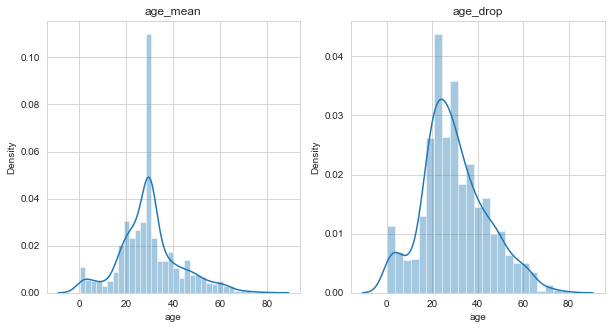

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

sns.set_style('whitegrid')
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.distplot(df1.age, ax=ax1)
sns.distplot(df1_d.age, ax=ax2)

ax1.set_title('age_mean')
ax2.set_title('age_drop')


In [11]:
#embarked 결측치 처리
def fillna(df):
    df = df.dropna(subset=['age'], how='any', axis=0)
    em = df['embarked'].value_counts(dropna=True).idxmax()

    df['embarked'].fillna(em, inplace=True)
    df['fare'].fillna(df['fare'].mean(), inplace=True)
    return df

titanic_df = fillna(titanic_df)
print(titanic_df.head())
titanic_df.info()

   pclass  survived     sex    age  sibsp  parch      fare embarked
0       1         1  female  29.00      0      0  211.3375        S
1       1         1    male   0.92      1      2  151.5500        S
2       1         0  female   2.00      1      2  151.5500        S
3       1         0    male  30.00      1      2  151.5500        S
4       1         0  female  25.00      1      2  151.5500        S
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1046 non-null   int64  
 1   survived  1046 non-null   int64  
 2   sex       1046 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1046 non-null   int64  
 5   parch     1046 non-null   int64  
 6   fare      1046 non-null   float64
 7   embarked  1046 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 73.5+ KB


<AxesSubplot:xlabel='fare', ylabel='Count'>

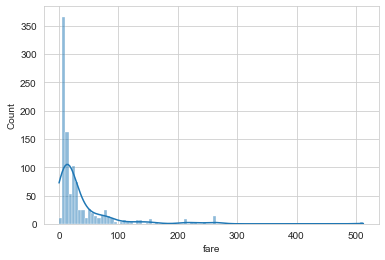

In [12]:
#age 및 fare_cat 만들기
import seaborn as sns
sns.histplot(titanic_df.fare, kde=True)

In [13]:
def fare_cat(x):
    cat = ''
    if x <=10 : cat=4
    elif x <=40 : cat=3
    elif x <=100 : cat = 2
    else : cat=1
    return cat
titanic_df['fare_cat'] = titanic_df['fare'].apply(lambda x : fare_cat(x))
titanic_df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,fare_cat
0,1,1,female,29.00,0,0,211.3375,S,1
1,1,1,male,0.92,1,2,151.5500,S,1
2,1,0,female,2.00,1,2,151.5500,S,1
3,1,0,male,30.00,1,2,151.5500,S,1
4,1,0,female,25.00,1,2,151.5500,S,1


<AxesSubplot:xlabel='age', ylabel='Count'>

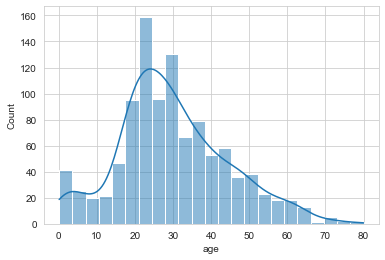

In [14]:
sns.histplot(titanic_df.age, kde=True)

In [15]:
def age_cat(age):
    cat = ''
    if age <= 10 : cat=0
    elif age <= 20 :cat=2
    elif age <=30 : cat=3
    elif age <=60 : cat=4
    else : cat=1
    return cat

titanic_df['age_cat'] = titanic_df['age'].apply(lambda x : age_cat(x))
titanic_df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,fare_cat,age_cat
0,1,1,female,29.00,0,0,211.3375,S,1,3
1,1,1,male,0.92,1,2,151.5500,S,1,0
2,1,0,female,2.00,1,2,151.5500,S,1,0
3,1,0,male,30.00,1,2,151.5500,S,1,3
4,1,0,female,25.00,1,2,151.5500,S,1,3


In [16]:
#family 변수 만들기
titanic_df['family'] = titanic_df['sibsp'] + titanic_df['parch']
titanic_df.head()

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1046 non-null   int64  
 1   survived  1046 non-null   int64  
 2   sex       1046 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1046 non-null   int64  
 5   parch     1046 non-null   int64  
 6   fare      1046 non-null   float64
 7   embarked  1046 non-null   object 
 8   fare_cat  1046 non-null   int64  
 9   age_cat   1046 non-null   int64  
 10  family    1046 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 98.1+ KB


In [17]:
# sex, embarked 원핫인코딩
onehot_sex = pd.get_dummies(titanic_df['sex'])
onehot_embarked = pd.get_dummies(titanic_df['embarked'], prefix='town')

titanic_df1 = pd.concat([titanic_df,onehot_embarked, onehot_sex], axis=1)

titanic_df1.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,fare_cat,age_cat,family,town_C,town_Q,town_S,female,male
0,1,1,female,29.00,0,0,211.3375,S,1,3,0,0,0,1,1,0
1,1,1,male,0.92,1,2,151.5500,S,1,0,3,0,0,1,0,1
2,1,0,female,2.00,1,2,151.5500,S,1,0,3,0,0,1,1,0
3,1,0,male,30.00,1,2,151.5500,S,1,3,3,0,0,1,0,1
4,1,0,female,25.00,1,2,151.5500,S,1,3,3,0,0,1,1,0


In [18]:
titanic_df1.info()
titanic_df1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1046 non-null   int64  
 1   survived  1046 non-null   int64  
 2   sex       1046 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1046 non-null   int64  
 5   parch     1046 non-null   int64  
 6   fare      1046 non-null   float64
 7   embarked  1046 non-null   object 
 8   fare_cat  1046 non-null   int64  
 9   age_cat   1046 non-null   int64  
 10  family    1046 non-null   int64  
 11  town_C    1046 non-null   uint8  
 12  town_Q    1046 non-null   uint8  
 13  town_S    1046 non-null   uint8  
 14  female    1046 non-null   uint8  
 15  male      1046 non-null   uint8  
dtypes: float64(2), int64(7), object(2), uint8(5)
memory usage: 103.2+ KB


,pclass,survived,sex,age,sibsp,parch,fare,embarked,fare_cat,age_cat,family,town_C,town_Q,town_S,female,male
0,1,1,female,29.00,0,0,211.3375,S,1,3,0,0,0,1,1,0
1,1,1,male,0.92,1,2,151.5500,S,1,0,3,0,0,1,0,1
2,1,0,female,2.00,1,2,151.5500,S,1,0,3,0,0,1,1,0
3,1,0,male,30.00,1,2,151.5500,S,1,3,3,0,0,1,0,1
4,1,0,female,25.00,1,2,151.5500,S,1,3,3,0,0,1,1,0


In [19]:
# 라벨인코딩 age_cat, fare_cate  / 필요없는애들 삭제
from sklearn.preprocessing import LabelEncoder

def labelencoding(df):
    le = LabelEncoder()
    df.age_cat = le.fit_transform(df.age_cat)

    return df

def drop_feature(df):
    df.drop(['age','fare','sibsp','parch','sex','embarked','fare_cat'], axis=1, inplace=True)
    return df 

titanic_df1 = labelencoding(titanic_df1)
titanic_df1 = drop_feature(titanic_df1)
titanic_df1.head()


,pclass,survived,age_cat,family,town_C,town_Q,town_S,female,male
0,1,1,3,0,0,0,1,1,0
1,1,1,0,3,0,0,1,0,1
2,1,0,0,3,0,0,1,1,0
3,1,0,3,3,0,0,1,0,1
4,1,0,3,3,0,0,1,1,0


In [ ]:
# 모델 평가 준비 작업
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 독립변수, 종속변수 분리
y_t_df = titanic_df['survived'] # 종속변수
X_t_df = titanic_df.drop('survived', axis = 1) # 독립변수

# 독립변수 정규화
# X_t_df = preprocessing.StandardScaler().fit(X_t_df).transform(X_t_df)

# 학습용 데이터와 평가용 데이터를 8:2 혹은 7:3으로 분리
X_train, X_test, y_train, y_test = train_test_split(X_t_df, y_t_df, test_size = 0.2,
                                                   random_state = 11)

print(X_train.shape)
print(X_test.shape)


In [20]:
titanic_df1.to_pickle('/Users/joy/Documents/GitHub/0Oong/수업내용/tdf.pkl')
titanic_df1.head()

,pclass,survived,age_cat,family,town_C,town_Q,town_S,female,male
0,1,1,3,0,0,0,1,1,0
1,1,1,0,3,0,0,1,0,1
2,1,0,0,3,0,0,1,1,0
3,1,0,3,3,0,0,1,0,1
4,1,0,3,3,0,0,1,1,0


In [21]:
# 독립변수 종속변수 분리
y_t_df = titanic_df1['survived']
x_t_df = titanic_df1.drop('survived', axis=1)

In [23]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 독립변수 정규화
x_t_df = preprocessing.StandardScaler().fit(x_t_df).transform(x_t_df)

#학습용 데이터와 평가용 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x_t_df, y_t_df, test_size = 0.2, random_state = 11)

print(x_train.shape)
print(x_test.shape)

(836, 8)
(210, 8)


In [24]:
# 모델 학습 및 평가
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)
accuracy_rf = accuracy_score(y_test, rf_pred).round(2)

lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
lr_pred = lr_model.predict(x_test)
accuracy_lr = accuracy_score(y_test,lr_pred).round(2)

print('rf 정확도:{}, lr 정확도:{}'.format(accuracy_rf,accuracy_lr))

rf 정확도:0.78, lr 정확도:0.8


### Q2. 고객 속성 및 거래 데이터를 아래 제시된 방법으로 생성 후 다음 과제를 수행하세요.

[고객별 속성 데이터]  
- id : 1번 ~ 100번 일련번호
- gender : 0,1 정수 난수 생성
- age : 10 ~ 80사이 정수 난수를 생성하고 범주화하여 age_cat 파생
- region : 1 ~ 5 사이 정수 난수 생성

[거래 데이터]  
- id : 1번 ~ 100번 일련번호(관측치 1000개)
- product : 고급제품(hpd), 일반제품(lpd)로 구분
- price : 100 ~ 200 사이 정수 난수 생성
- qty : 1 ~ 2 사이 정수 난수 생성
- day : 요일
- date : 2020-01-01 ~ 2021-12-31 사이의 날짜 1000개 생성
- amount : price * qty로 산출

[과제]  
- 고객 속성(id, 성별, 연령, 거주지역) 데이터와 거래 데이터를 통합한 데이터 프레임 df를 생성하세요.
- df를 수정하여 5가지 이상의 인사이트를 포함한 데이터 셋으로 변환하세요
- df 를 탐색적 분석을 통하여 인사이트를 도출하세요.

#### 점수 산정
- 인사이트 개수에 따라 점수 부여: 5개 50점,4개 45점,3개 40점,2개 35점,1개 30점

In [ ]:
# 1. 연도별 증감률 2. 성별 증감률

In [32]:
import numpy as np
import pandas as pd 
np.random.seed(1)

#id
no = np.arange(1,101)
l1 = pd.Series(no)

#gender
gender = np.random.randint(2, size=100)
g1 = pd.Series(gender)

#age
age = np.random.randint(10,81, size = 100)
a1 = pd.Series(age)

#region
region = np.random.randint(1,6, size=100)
r1 = pd.Series(region)

##고객 데이터
df1 = pd.concat([l1,g1,a1,r1], axis=1)
df1.rename(columns={0:'no',1:'gender',2:'age',3:'region'}, inplace=True)
df1.head()

,no,gender,age,region
0,1,1,47,5
1,2,1,67,3
2,3,0,48,5
3,4,0,18,3
4,5,1,42,1


In [33]:
# 거래 데이터 틀
data = np.zeros((1000,6))
df2 = pd.DataFrame(data, columns=['no','product','price','qty','day','date'])
df2.head()

,no,product,price,qty,day,date
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# 거래 데이터 틀 채우기
np.random.seed(1)
df2['no'] = np.random.randint(1,101,1000)
df2['product'] = np.random.randint(1,3,1000)
df2['price']=np.random.randint(100,201,1000)
df2['qty'] = np.random.randint(1,3,1000)
df2['day'] = np.random.choice(['MON','TUE','WED','THU','FRI','SAT','SUN'],1000)
df2['date'] = pd.date_range(start='2020-01-01', end='2021-12-31', periods=1000)
df2.head()

,no,product,price,qty,day,date
0,38,2,159,2,SUN,2020-01-01 00:00:00.000000000
1,13,1,117,1,FRI,2020-01-01 17:32:15.135135135
2,73,1,122,2,WED,2020-01-02 11:04:30.270270270
3,10,2,154,2,SUN,2020-01-03 04:36:45.405405405
4,76,2,113,2,THU,2020-01-03 22:09:00.540540540


In [35]:
# 연도별 증감률을 알기 위해 date 삭제 및 year 칼럼 생성
df2['year'] = df2.date.dt.year
df2 = df2.drop('date', axis=1)
df2.head()

,no,product,price,qty,day,year
0,38,2,159,2,SUN,2020
1,13,1,117,1,FRI,2020
2,73,1,122,2,WED,2020
3,10,2,154,2,SUN,2020
4,76,2,113,2,THU,2020


### values 값 조작

In [36]:
#price, product 조정 1고가 2 저가
def pp(product, price):
    if product==1 : return price * 20
    else : return price * 10 

df2['price'] = df2.apply(lambda x : pp(x['product'], x['price']), axis=1)
df2.head()

,no,product,price,qty,day,year
0,38,2,1590,2,SUN,2020
1,13,1,2340,1,FRI,2020
2,73,1,2440,2,WED,2020
3,10,2,1540,2,SUN,2020
4,76,2,1130,2,THU,2020


In [37]:
#qty조정
def pq(product, qty):
    if product==2 : return qty * 10
    else : return qty 
df2['qty'] = df2.apply(lambda x : pq(x['product'], x['qty']), axis=1)
df2.head()

,no,product,price,qty,day,year
0,38,2,1590,20,SUN,2020
1,13,1,2340,1,FRI,2020
2,73,1,2440,2,WED,2020
3,10,2,1540,20,SUN,2020
4,76,2,1130,20,THU,2020


In [38]:
#amount 생성
df2['amount'] = df2.qty * df2.price
df2.head()

,no,product,price,qty,day,year,amount
0,38,2,1590,20,SUN,2020,31800
1,13,1,2340,1,FRI,2020,2340
2,73,1,2440,2,WED,2020,4880
3,10,2,1540,20,SUN,2020,30800
4,76,2,1130,20,THU,2020,22600


In [39]:
#price 및 qty drop한 새로운 df
df3 = df2.copy()
df3 = df3.drop(['qty','price'], axis=1)
df3.head() 

,no,product,day,year,amount
0,38,2,SUN,2020,31800
1,13,1,FRI,2020,2340
2,73,1,WED,2020,4880
3,10,2,SUN,2020,30800
4,76,2,THU,2020,22600


In [41]:
#1사치품 감소, 2생활용품 증가
def pdcut(year,product,amount):
    if (year==2021) & (product==1):
        return amount*0.5
    else : return amount
df3['amount'] = df3.apply(lambda x : pdcut(x['year'],x['product'],x['amount']),axis=1)
df3.head()

,no,product,day,year,amount
0,38,2,SUN,2020,31800.0
1,13,1,FRI,2020,2340.0
2,73,1,WED,2020,4880.0
3,10,2,SUN,2020,30800.0
4,76,2,THU,2020,22600.0


In [44]:
#고객별 연간 구매금액 알아보기
df3['yp'] = df3[['year','product']].astype(str).apply('_'.join, axis=1)
df3.head()

,no,product,day,year,amount,yp
0,38,2,SUN,2020,31800.0,2020_2
1,13,1,FRI,2020,2340.0,2020_1
2,73,1,WED,2020,4880.0,2020_1
3,10,2,SUN,2020,30800.0,2020_2
4,76,2,THU,2020,22600.0,2020_2


In [45]:
pdf = pd.pivot_table(df3, 
    index='no', 
    columns='yp',
    values='amount',
    aggfunc ='sum')
pdf

yp,2020_1,2020_2,2021_1,2021_2
no,,,,
1,4680.0,103000.0,8300.0,46700.0
2,11240.0,24200.0,14070.0,51400.0
3,10800.0,61000.0,1730.0,35000.0
4,12200.0,34200.0,8120.0,37700.0
5,NaN,NaN,3070.0,79900.0
...,...,...,...,...
96,4280.0,NaN,6350.0,64000.0
97,11340.0,54900.0,13040.0,121900.0
98,3420.0,58200.0,9760.0,100400.0


In [46]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 100
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2020_1  92 non-null     float64
 1   2020_2  92 non-null     float64
 2   2021_1  98 non-null     float64
 3   2021_2  89 non-null     float64
dtypes: float64(4)
memory usage: 3.9 KB


In [47]:
pdf['2020_1'].fillna(pdf['2020_1'].mean(), inplace=True)
pdf['2020_2'].fillna(pdf['2020_2'].mean(), inplace=True)
pdf['2021_1'].fillna(pdf['2021_1'].mean(), inplace=True)
pdf['2021_2'].fillna(pdf['2021_2'].mean(), inplace=True)

pdf.columns.name=None
pdf.reset_index(inplace=True)
pdf.head()

,no,2020_1,2020_2,2021_1,2021_2
0,1,4680.000000,103000.000000,8300.0,46700.0
1,2,11240.000000,24200.000000,14070.0,51400.0
2,3,10800.000000,61000.000000,1730.0,35000.0
3,4,12200.000000,34200.000000,8120.0,37700.0
4,5,13041.521739,60843.478261,3070.0,79900.0


In [50]:
pdf['2020_1'] = (pdf['2020_1']/pdf['2020_1'].sum()) *100
pdf['2020_2'] = (pdf['2020_2']/pdf['2020_2'].sum()) *100
pdf['2021_1'] = (pdf['2021_1']/pdf['2021_1'].sum()) *100
pdf['2021_2'] = (pdf['2021_2']/pdf['2021_2'].sum()) *100
pdf.head()

,no,2020_1,2020_2,2021_1,2021_2
0,1,0.358854,1.692868,1.326246,0.750329
1,2,0.861863,0.397742,2.248227,0.825844
2,3,0.828124,1.002573,0.276434,0.562345
3,4,0.935474,0.562098,1.297484,0.605726
4,5,1.000000,1.000000,0.490551,1.283754


In [62]:
pdf['hpd'] = (pdf['2021_1'] - pdf['2020_1'])/pdf['2020_1']
pdf['lpd'] = (pdf['2021_2'] - pdf['2020_2'])/pdf['2020_2']
pdf1 = pdf[['no','hpd','lpd']]
pdf1.head()

,no,hpd,lpd
0,1,2.695784,-0.556770
1,2,1.608568,1.076333
2,3,-0.666192,-0.439098
3,4,0.386981,0.077617
4,5,-0.509449,0.283754


In [63]:
df = pd.merge(df1, pdf1, on='no', how='outer')
df.head()

,no,gender,age,region,hpd,lpd
0,1,1,47,5,2.695784,-0.556770
1,2,1,67,3,1.608568,1.076333
2,3,0,48,5,-0.666192,-0.439098
3,4,0,18,3,0.386981,0.077617
4,5,1,42,1,-0.509449,0.283754


In [86]:
#age_cat
def age_cat(x):
    cat = ''
    if x < 20 : cat=1
    elif x < 30 : cat=2
    elif x < 40 : cat = 3
    elif x < 50 : cat=4
    elif x <60 : cat=5
    else : cat = 6
    return cat
df['age_cat'] = df.age.apply(lambda x : age_cat(x))
df.drop('age',axis=1, inplace=True)
df.head()

,no,gender,region,hpd,lpd,2020,2021,ratio,target,age_cat
0,1,1,5,2.695784,-0.556770,107680.000000,55000.0,-0.489227,0,4
1,2,1,3,1.608568,1.076333,35440.000000,65470.0,0.847348,1,6
2,3,0,5,-0.666192,-0.439098,71800.000000,36730.0,-0.488440,0,4
3,4,0,3,0.386981,0.077617,46400.000000,45820.0,-0.012500,0,1
4,5,1,1,-0.509449,0.283754,69361.428571,82970.0,0.196198,1,4


In [57]:
df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   no       1000 non-null   int64  
 1   product  1000 non-null   int64  
 2   day      1000 non-null   object 
 3   year     1000 non-null   int64  
 4   amount   1000 non-null   float64
 5   yp       1000 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 47.0+ KB


,no,product,day,year,amount,yp
0,38,2,SUN,2020,31800.0,2020_2
1,13,1,FRI,2020,2340.0,2020_1
2,73,1,WED,2020,4880.0,2020_1
3,10,2,SUN,2020,30800.0,2020_2
4,76,2,THU,2020,22600.0,2020_2


In [64]:
#종속변수
df_y = df3[['no','year','amount']]
pvt = pd.pivot_table(df_y,
    index='no',
    columns='year',
    values='amount',
    aggfunc='sum')
pvt = pvt.reset_index()
pvt.columns.name = None
pvt.head()

,no,2020,2021
0,1,107680.0,55000.0
1,2,35440.0,65470.0
2,3,71800.0,36730.0
3,4,46400.0,45820.0
4,5,NaN,82970.0


In [65]:
pvt.info()
pvt[2020].fillna(pvt[2020].mean(), inplace=True)
pvt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   no      100 non-null    int64  
 1   2020    98 non-null     float64
 2   2021    100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   no      100 non-null    int64  
 1   2020    100 non-null    float64
 2   2021    100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [66]:
df = pd.merge(df, pvt, on='no', how='outer')
df.head()

,no,gender,age,region,hpd,lpd,2020,2021
0,1,1,47,5,2.695784,-0.556770,107680.000000,55000.0
1,2,1,67,3,1.608568,1.076333,35440.000000,65470.0
2,3,0,48,5,-0.666192,-0.439098,71800.000000,36730.0
3,4,0,18,3,0.386981,0.077617,46400.000000,45820.0
4,5,1,42,1,-0.509449,0.283754,69361.428571,82970.0


In [67]:
df['ratio'] = (df[2021]-df[2020])/df[2020]
df.head()

,no,gender,age,region,hpd,lpd,2020,2021,ratio
0,1,1,47,5,2.695784,-0.556770,107680.000000,55000.0,-0.489227
1,2,1,67,3,1.608568,1.076333,35440.000000,65470.0,0.847348
2,3,0,48,5,-0.666192,-0.439098,71800.000000,36730.0,-0.488440
3,4,0,18,3,0.386981,0.077617,46400.000000,45820.0,-0.012500
4,5,1,42,1,-0.509449,0.283754,69361.428571,82970.0,0.196198


In [68]:
df1 = df.drop([2020,2021],axis=1)
df1.head()

,no,gender,age,region,hpd,lpd,ratio
0,1,1,47,5,2.695784,-0.556770,-0.489227
1,2,1,67,3,1.608568,1.076333,0.847348
2,3,0,48,5,-0.666192,-0.439098,-0.488440
3,4,0,18,3,0.386981,0.077617,-0.012500
4,5,1,42,1,-0.509449,0.283754,0.196198


In [69]:
# 일반제품의 변화율인 lpd 컬럼과 구매증감율 ratio의 상관관계가 0.5 초과
df1[['lpd','hpd','ratio']].corr()

,lpd,hpd,ratio
lpd,1.000000,-0.003388,0.470124
hpd,-0.003388,1.000000,0.106182
ratio,0.470124,0.106182,1.000000


In [85]:
def raising(a,b): #2020년, 2021년 증감률을 위해
    if b>=a : return 1 #증가
    else : return 0 #감소

df['target'] = df.apply(lambda x : raising(x[2020],x[2021]), axis=1)
df.head()

,no,gender,age,region,hpd,lpd,2020,2021,ratio,target
0,1,1,47,5,2.695784,-0.556770,107680.000000,55000.0,-0.489227,0
1,2,1,67,3,1.608568,1.076333,35440.000000,65470.0,0.847348,1
2,3,0,48,5,-0.666192,-0.439098,71800.000000,36730.0,-0.488440,0
3,4,0,18,3,0.386981,0.077617,46400.000000,45820.0,-0.012500,0
4,5,1,42,1,-0.509449,0.283754,69361.428571,82970.0,0.196198,1


In [81]:
y = df['target']
x = df.drop(['no',2020,2021,'ratio','target'], axis=1)

In [84]:
# 인사이트 예시(요약 기술 및 관련 통계 및 시각화 제시)

In [82]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 11)

print(x_train.shape)
print(x_test.shape)

(80, 5)
(20, 5)


In [83]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression #로지스틱 회귀분석
from sklearn.ensemble import RandomForestClassifier #랜덤 포레스트

#랜덤 포레스트
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)
accuracy_rf = accuracy_score(y_test, rf_pred).round(2)

#로지스틱 회귀분석
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)
accuracy_lr = accuracy_score(y_test, lr_pred).round(2)

print('rf 정확도 : {}, lr 정확도: {}'.format(accuracy_rf, accuracy_lr))

rf 정확도 : 0.8, lr 정확도: 0.75
